In [95]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from math import exp

%matplotlib inline

# 1. SVM

In [119]:
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y'].reshape(1, -1)[0]

### Funções de plot

In [120]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


### Figura com o conjunto de dados

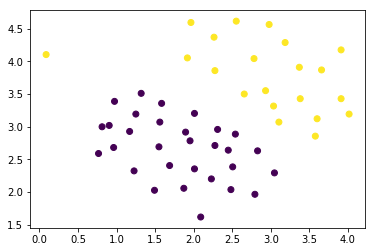

In [121]:
plt.scatter(X[:,0], X[:, 1], c=y)

### SVM com C=1

In [122]:
linearSVM = SVC(kernel='linear', C=1)
linearSVM.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
coefs = linearSVM.intercept_ + linearSVM.coef_ 
coefs

array([[-8.94171215, -8.21491726]])

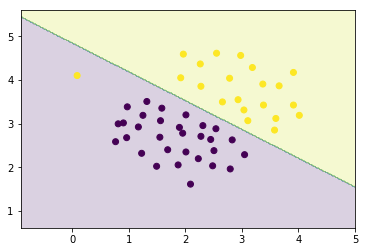

In [124]:
xx, yy = make_meshgrid(X[:,0], X[:, 1])

ax.set_ylim(yy.min(),yy.max())
ax.set_xlim(xx.min(), xx.max())
fig, ax = plt.subplots()
plot_contours(ax, linearSVM, xx, yy, cmpa=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X[:,0], X[:, 1], c=y)

### SVM com C=100

In [126]:
linearSVM = SVC(kernel='linear', C=100)
linearSVM.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
coefs = linearSVM.intercept_ + linearSVM.coef_ 
coefs

array([[-48.44894239, -40.04100381]])

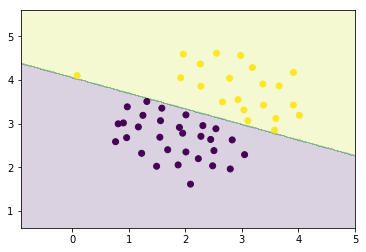

In [128]:
fig, ax = plt.subplots()
ax.set_ylim(yy.min(),yy.max())
ax.set_xlim(xx.min(), xx.max())
plot_contours(ax, linearSVM, xx, yy, cmpa=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X[:,0], X[:, 1], c=y)

#### Quanto maior o valor de C, mais rígido o hiperplano tende a ser, buscando maximizar a distância entre duas classes linearmente separáveis sem errar a classificação durante o treino. Do contrário, o hiperplano tende a ser mais flexível, aceitando alguns erros de classificação no treino em troca de uma maior distância na separação das classes e acertos na classificação real, como podemos perceber nas duas imagens acima. A ideia por trás do parâmetro é justamente a regularização do modelo, pois conforme seja o futuro dos dados, um modelo mais flexível/generalizado pode se tornar mais apropriado na classificação de futuros dados, dado que a distância de separação do hiperplano é maior. 

### SVM com C=0.001

In [129]:
linearSVM = SVC(kernel='linear', C=0.001)
linearSVM.fit(X, y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
coefs = linearSVM.intercept_ + linearSVM.coef_ 
coefs

array([[-1.06605043, -1.06266403]])

#### Como discutido, o parâmetro C corresponde à uma parâmetro de regularização. Assim, podemos notar com a diferença dos valores dos coeficientes de cada modelo com C específico que, quanto menor é o C, menor é o valor dos pesos W. Logo, podemos perceber que W tende a zerar.

In [94]:
y[36] = 1
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1], dtype=uint8)

In [98]:
linearSVM = SVC(kernel='linear', C=exp(9))
linearSVM.fit(X, y)

SVC(C=8103.083927575384, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
coefs = linearSVM.intercept_ + linearSVM.coef_ 
coefs

array([[-10.6624267 ,  -9.57139592]])

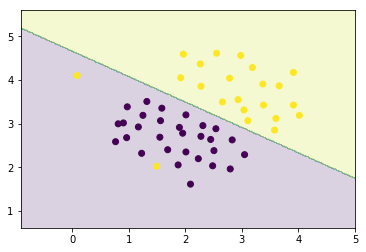

In [99]:
fig, ax = plt.subplots()
plot_contours(ax, linearSVM, xx, yy, cmpa=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X[:,0], X[:, 1], c=y)

#### O tempo de convergência tende a ser maior, dado que agora é preciso testar, conforme a geração dos vetores de suporte, um hiperplano que separe bem as classes mesmo com um ponto alterado. Assim, é preciso estar adequado conforme o parâmetro C, de maneira que otimize a distância dos vetores de suporte, bem como a regularização de maneira a abdicar de erros de classificação no treino

# SVM e Kernel RBF

In [132]:
data = sio.loadmat('ex6data2.mat')
X = data['X']
y = data['y'].reshape(1, -1)[0]

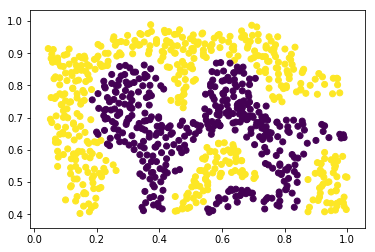

In [133]:
plt.scatter(X[:,0], X[:, 1], c=y)

#### Conforme o comportamento dos dados no plot acima, precisamos utilizar um kernel não linear

In [144]:
rbf1 = SVC(kernel='rbf', C=1, gamma=0.1)
rbf1.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
rbf2 = SVC(kernel='rbf', C=1, gamma=0.2)
rbf2.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [146]:
xx, yy = make_meshgrid(X[:,0], X[:, 1])

### Sigma 0.1

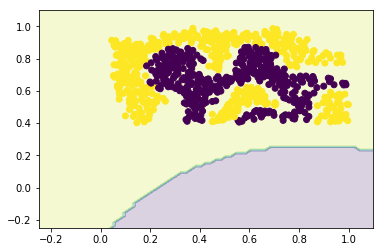

In [152]:
fig, ax = plt.subplots()
ax.set_ylim(-0.25,1.1)
ax.set_xlim(-0.25,1.1)
plot_contours(ax, rbf1, xx, yy, cmpa=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X[:,0], X[:, 1], c=y)

### Sigma 0.2

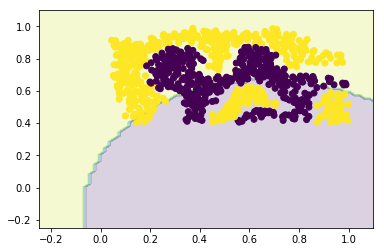

In [153]:
fig, ax = plt.subplots()
ax.set_ylim(-0.25,1.1)
ax.set_xlim(-0.25,1.1)
plot_contours(ax, rbf2, xx, yy, cmpa=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X[:,0], X[:, 1], c=y)